# SEER

## Main components:
* SwAV
* RegNetY

## SwAV
SwAV (Swapping Assignments between multiple Views of the same image)

SwAV __main idea__ is contrasting cluster assignments: <br/>
train embedding that yields consistent cluster assignments btwn multiple views of the same img <br/>
(i.e. clusters invariant to data augmentations)

__Algorithm:__
* a batch of B imgs
* each image i is transformed into two views: x_i1 & x_i2
* get two sets of views: $(x_{11}, x_{21}, ... , x_{B1})$ and $(x_{12}, x_{22}, ... , x_{B2})$
* featurize them with a convnet
* get two sets of features: $(f_{11}, f_{21}, ... , f_{B1})$ and $(f_{12}, f_{22}, ... , f_{B2})$
* cluster them using Optimal Transport Solver 
  <span style="color:orange"> не совсем уверена в этом моменте </span>
* swap cluster assignments btwn two sets of features
* claster assignment $y_{i1}$ of view $x_{i1}$ should be predicted 
  from feature representation $f_{i2}$ of view $x_{i2}$ and vice-viersa
* using cluster prototypes $v_1, ..., v_K $
  <span style="color:orange"> сколько делали класетров? </span>
  loss is defined as: <br/>
  $L(f_{i1}, f_{i2}) = l(f_{i1}, y_{i2}) + l(f_{i2}, y_{i1})$, where 
  $$l(f,y) = - \sum_{k}y^{(k)} log(p^{(k)}) = BCE(p^{(k)}, y^{(k)})$$
  $$p^{(k)} = \frac{exp(\frac{1}{\tau}f_t^Tv_k)}{\sum_{k'}exp(\frac{1}{\tau}f_t^Tv_{k'})} = Softmax(\frac{1}{\tau}f_t^Tv_{k'})$$

## RegNetY

Sources: [medium](https://medium.com/visionwizard/simple-powerful-and-fast-regnet-architecture-from-facebook-ai-research-6bbc8818fb44)

### AnyNet design space
AnyNet - NN design space [arxiv](https://arxiv.org/abs/2003.13678)

#### General structure
Same as ResNet/ResNeXt structure: stem block -> several layers blocks -> head block<br>
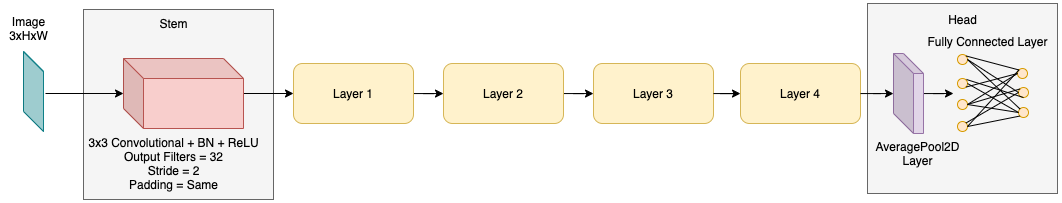

__Stem block__ converts initial img into some unifrom representation
<br/> consists of conv+bn+relu

__Layer block__ transforms one unifrom repr into the next one

__Head block__ does classification based on last uniform repr
<br/> consists of avg pool + fully connected <br/>

__Layer block__:

Each layer block consists of a chain of residual blocks
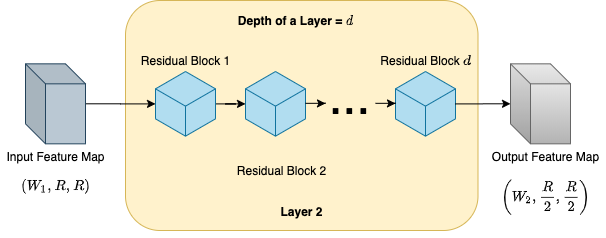

Residual block is represneted by a simple block in ResNet or a bottleneck block in ResNext
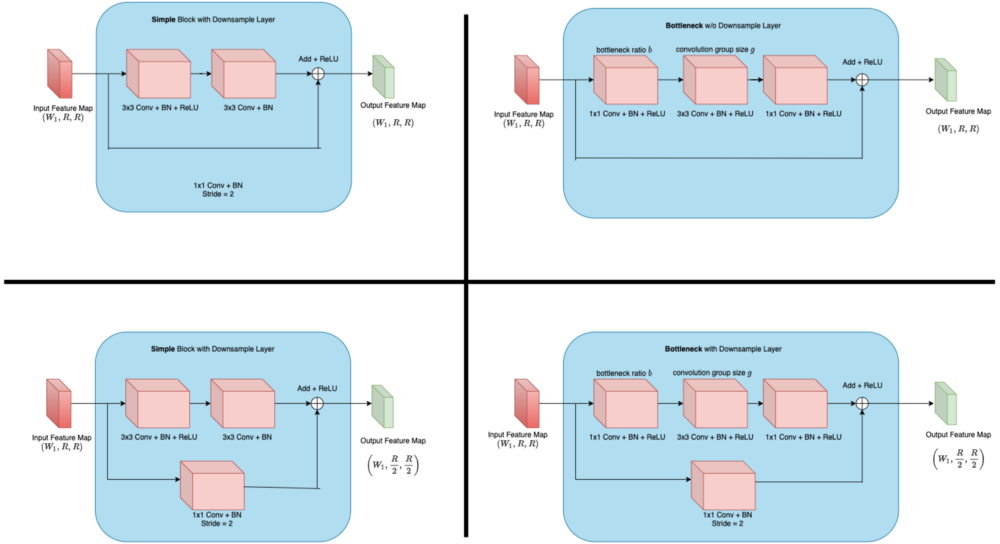

#### Params

It is defined by params:
* $d$ (__depth__) - number of residual blocks
* $w$ (__width__) - number of channels (remains constant throughout the block

ResNeXT adds 2 more params:
* $b$ (__bottleneck ratio__) - ratio of channel decrease inside the block
* $g$ (__group size__) - number of filters(paths) inside the group convolution

__Note:__ 4 layers give 16 degrees of freedom in NN arch design

#### Restrictions of params
Authors considered param values:
* Depth d = [1, 2, 3, 4, 5, ... , 16] #Total = 16
* Width w = [8, 16, 24, ..., 1024] #Multiples of 8 <= 1024; Total=128
* Bottleneck Ratio b: [1, 2, 4] #Total = 3
* Group Size g: [1, 2, 4, 8, 16, 32] #Total = 6

Authors considered several restrictions:
1. AnyNetXA: unrestricted => 10^{18} architectures
1. AnyNetXB: b(L1)=b(L2)=b(L3)=b(L4) => 10^{16}
1. AnyNetXC: AnyNetXB + g(L1)=g(L2)=g(L3)=g(L4) => 10^{14}
1. AnyNetXD: AnyNetXC + w(L1)<=w(L2)<=w(L3)<=w(L4) => 10^{13}
1. AnyNetXE: AnyNetXD + d(L1)<=d(L2)<=d(L3)<=d(L4) => 10^{13}

### RegNet design space
TBD (та же статья)
но в целом это какая-то вариация на тему AnyNet

### Optimization and Training at Scale (some hacks)
TBD

### Results
TBD